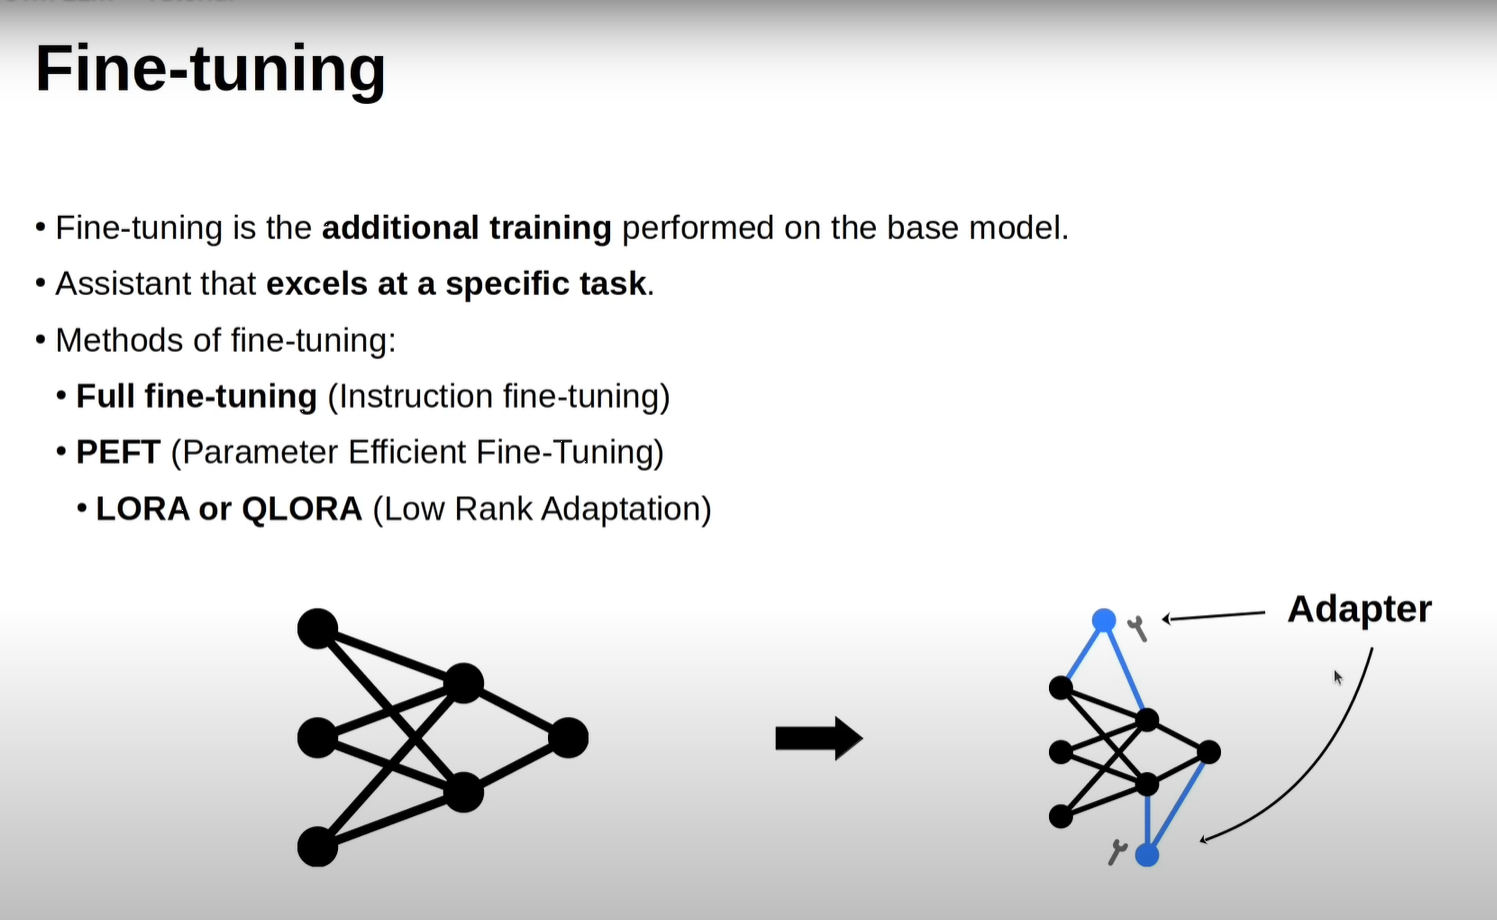



# 🧠 Fine-Tuning Explained (Simple and Complete)

Fine-tuning means **taking a pre-trained AI model** — one that already knows a lot from studying huge amounts of data — and **teaching it something more specific** using your own smaller dataset.

Imagine a student who already knows English. If you now give them only *medical books*, they’ll start talking like a doctor. That’s what fine-tuning does — it **focuses a general model on a specific topic or skill**.

When a model is first trained, it learns general knowledge: how sentences are formed, what common words mean, or what basic objects look like. This process is called *pre-training*, and it’s very expensive — it needs massive data and huge GPUs.
Fine-tuning is the next step where we reuse that knowledge and just make *small adjustments* to the model’s internal settings (called weights). This way, it becomes better at the new task without forgetting what it already knows.

For example:

* If you fine-tune ChatGPT on *legal documents*, it becomes better at legal writing.
* If you fine-tune a vision model on *medical X-rays*, it becomes good at detecting diseases.
* If you fine-tune a voice model on *your accent*, it starts understanding your speech more accurately.

Under the hood, fine-tuning works by feeding your dataset into the model and training it again — but gently. The model compares its predictions with the correct answers, measures the error (called *loss*), and slightly adjusts its weights to reduce that error. This process repeats many times until the model learns your data patterns.

Because large models have billions of parameters, we often don’t train the whole thing again. Instead, we use **efficient fine-tuning methods** like:

* **Partial fine-tuning** – only some layers are updated.
* **LoRA (Low-Rank Adaptation)** – small adapter layers are added, making fine-tuning faster and cheaper.
* **Prompt or prefix tuning** – instead of changing the model, we train a few special tokens that guide it toward your task.

Fine-tuning can be used for all types of AI:

* In **language models**, it helps write, chat, or summarize in specific domains.
* In **vision models**, it helps recognize custom objects.
* In **audio models**, it helps adapt to specific voices or sounds.

In short, fine-tuning:

1. Reuses an existing pre-trained model.
2. Trains it on your smaller dataset.
3. Slightly updates its knowledge to fit your domain.
4. Produces a specialized, smarter version of the model.

It’s powerful because it saves time, data, and money — you don’t start from zero; you build on top of something already intelligent.

You can think of it like this:

> Pre-training builds a brain.
> Fine-tuning gives it a profession.



In [ ]:
file_path="../data/private/fine_tuning.txt"
with open (file_path,'r',encoding='utf-8') as f:
    lines=f.readlines()

len(lines)

In [ ]:
import re

encryption_message = "Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more."
media_pattern = "<Media omitted>"
email_pattern = r'[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}'
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
edited_message = "<This message was edited>"
deleted_message = "You deleted this message"
null_message = "null"
created_group_message = "created group"
added_you_to_group_message = "added you"
tagging_pattern = r'@[\w]+'


filtered_lines = []
for line in lines:
    if (
            encryption_message not in line and
            deleted_message not in line and
            null_message != line.split(" ")[-1] and
            media_pattern not in line and
            created_group_message not in line and
            added_you_to_group_message not in line and
            not re.search(email_pattern, line) and
            not re.search(url_pattern, line)
    ):
        line = line.replace(edited_message, "").strip()
        line = re.sub(tagging_pattern, "", line).strip()
        filtered_lines.append(line)

pattern = r'(\d{2}/\d{2}/\d{4}, \d{2}:\d{2}) - (.*?): (.*?)(?=\n\d{2}/\d{2}/\d{4}, \d{2}:\d{2} -|$)'
content = '\n'.join(filtered_lines)
messages = re.findall(pattern, content, re.DOTALL)

lines_removed = len(lines) - len(filtered_lines)
print(f"Lines removed: {lines_removed}")

# Create the dataset

### 1. Group messages by sender

If a conversation is structured as follows:  

```
User 1: Hey!  
User 1: How are you?  
User 2: I am fine  
User 2: And you?  
User 1: Good.  
```

We want to transform it into:  

```
User 1: Hey!\nHow are you? 
User 2: I am fine\nAnd you?  
User 1: Good  
```

In [ ]:
grouped_messages=[]
for _,sender,message in messages:
    if grouped_messages and grouped_messages[-1]['sender'] == sender:
        grouped_messages[-1]["message"] += "\n" + message
    else:
        grouped_messages.append({
            "sender":sender,
            "message": message
        })

len(grouped_messages)


---

## 🔍 Purpose

This script **groups consecutive messages** from the same sender into a single message block. It helps clean up chat logs or conversations where the same person sends multiple messages in a row.

---

## 🧠 Step-by-Step Breakdown

### 1. `grouped_messages = []`

* Initializes an empty list to store grouped messages.

---

### 2. `for _, sender, message in messages:`

* Iterates through each item in the `messages` list.
* Each `message` item is expected to be a tuple with three elements:

  * `_`: Some value (often a timestamp or unused index — ignored here)
  * `sender`: The person who sent the message
  * `message`: The content of the message

---

### 3. `if grouped_messages and grouped_messages[-1]['sender'] == sender:`

* Checks if:

  * `grouped_messages` is not empty, **and**
  * The last grouped message is from the **same sender**
* If true → Append the current message to the last message block (with a newline).

---

### 4. `grouped_messages[-1]["message"] += "\n" + message`

* Concatenates the new message to the previous one with a line break (`\n`), keeping the sender the same.

---

### 5. `else:`

* If the sender is different or it's the first message:

  * Create a **new message group** with the current sender and message.

```python
grouped_messages.append({
    "sender": sender,
    "message": message
})
```

---

## 📏 `len(grouped_messages)`

* Returns the **number of grouped messages** — i.e., how many sender blocks are created after combining consecutive messages from the same sender.

---

## 📦 Example

Given this input:

```python
messages = [
    (1, "Alice", "Hi"),
    (2, "Alice", "How are you?"),
    (3, "Bob", "Hello"),
    (4, "Alice", "I'm back"),
    (5, "Alice", "With more info")
]
```

Resulting `grouped_messages` would be:

```python
[
    {'sender': 'Alice', 'message': 'Hi\nHow are you?'},
    {'sender': 'Bob', 'message': 'Hello'},
    {'sender': 'Alice', 'message': "I'm back\nWith more info"}
]
```

---

## ✅ Summary

This code merges **consecutive** messages from the same sender into a single text block and returns how many such blocks are formed.


### 2. Include special tokens

Each message follows this format:
```
<|startoftext|>Sender<|seprator|>Message<|endoftext|>
```

In [ ]:
#Define special tokens
start_of_text_tokens = "<|startoftext|>"
end_of_text_token = "<|endoftext|>"
seprator_token="<|seprator|>"

fine_tuning_data = []

for message in grouped_messages:
    sender=message['sender']
    message_text = message["message"]
    input_sequence= f"{start_of_text_tokens}{sender}{seprator_token}{message_text}{end_of_text_token}"
    fine_tuning_data.append(input_sequence)

len(fine_tuning_data)


---

## 🧠 Purpose

This script prepares **cleaned and structured message data** for **fine-tuning a language model**, like GPT. It wraps each sender-message pair with **special tokens** to help the model understand:

* Where each training example starts and ends.
* How to separate the sender’s identity from the message content.

---

## 🧱 Step-by-Step Breakdown

### 🔹 1. Define Special Tokens

```python
start_of_text_tokens = "<|startoftext|>"
end_of_text_token = "<|endoftext|>"
seprator_token = "<|seprator|>"
```

These tokens help mark:

* Start of a message block (`<|startoftext|>`)
* End of a message block (`<|endoftext|>`)
* Separation between sender and message (`<|seprator|>`)

> **Note**: Typo in `seprator_token` → should probably be spelled `separator_token`. But it works as long as it's used consistently.

---

### 🔹 2. Initialize `fine_tuning_data`

```python
fine_tuning_data = []
```

This list will store the processed message strings, ready for model training.

---

### 🔹 3. Loop Over Grouped Messages

```python
for message in grouped_messages:
    sender = message['sender']
    message_text = message["message"]
```

Extracts:

* The **sender** of the message
* The **full (possibly multi-line)** message text

---

### 🔹 4. Format Each Message as a Training Example

```python
input_sequence = f"{start_of_text_tokens}{sender}{seprator_token}{message_text}{end_of_text_token}"
```

Each training sequence looks like:

```
<|startoftext|>Alice<|seprator|>Hi\nHow are you?<|endoftext|>
```

This format:

* Helps the model associate the sender with the message
* Prepares consistent delimiters for supervised fine-tuning

---

### 🔹 5. Append to Training Data

```python
fine_tuning_data.append(input_sequence)
```

Each formatted string is added to the training dataset list.

---

### 🔹 6. Count Training Examples

```python
len(fine_tuning_data)
```

Returns the number of formatted examples — same as the number of grouped messages, since each block becomes one training item.

---

## ✅ Summary

This code prepares **clean, consistently formatted message samples** for fine-tuning by wrapping them in special tokens. It allows models to learn not only the content but also who said it and where message boundaries lie.

---

## 📦 Example Output (1 Entry)

For a grouped message:

```python
{"sender": "Alice", "message": "Hi\nHow are you?"}
```

The output in `fine_tuning_data` would be:

```
<|startoftext|>Alice<|seprator|>Hi
How are you?<|endoftext|>
```

---



### 3. Save the Data

In [ ]:
import json
save_path="../output/fine_tuning/data/fine_tuning.json"
with open(save_path,"w",encoding='utf-8') as f:
    json.dump(fine_tuning_data,f,ensure_ascii=False,indent=4)



## 🧠 Purpose

This code saves your formatted fine-tuning data to a `.json` file, preserving readability and character encoding.

---

## 🧱 Step-by-Step Breakdown

### 📥 `import json`

* Imports Python’s built-in JSON module for reading and writing `.json` files.

---

### 📂 `save_path = "../output/fine_tuning/data/fine_tuning.json"`

* Specifies where to save the file.
* This path:

  * Goes up one directory (`..`)
  * Into `output/fine_tuning/data/`
  * File name: `fine_tuning.json`

> ✅ Make sure this directory exists, or else Python will raise a `FileNotFoundError`.

---

### 📝 Write to File

```python
with open(save_path, "w", encoding='utf-8') as f:
```

* Opens the file in **write mode** (`"w"`)
* Uses **UTF-8 encoding** to support international characters
* The `with` statement ensures the file is safely closed after writing

---

### 📤 Dump JSON

```python
json.dump(fine_tuning_data, f, ensure_ascii=False, indent=4)
```

* `fine_tuning_data`: The list of training examples
* `f`: File handle to write into
* `ensure_ascii=False`: Keeps non-ASCII characters (like emojis, accents, etc.) in their natural form
* `indent=4`: Makes the JSON file pretty and human-readable

---

## ✅ Summary

This script:

1. Converts your structured fine-tuning data into a readable JSON format.
2. Saves it to a defined file path for later use in training a model.

---

## 📦 Example Output (in `fine_tuning.json`)

```json
[
    "<|startoftext|>Alice<|seprator|>Hi\nHow are you?<|endoftext|>",
    "<|startoftext|>Bob<|seprator|>Hello<|endoftext|>"
]
```

---

